In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc
from matplotlib.colors import LinearSegmentedColormap

# 自定义颜色映射 （ 基因-模块关系热图用）
colors = ["#D3D3D3", '#4575b4',"white", "#d73027"]  
cmap_custom_3 = LinearSegmentedColormap.from_list("custom_rdbu_3", colors)

In [3]:
all_adata = {
    '1i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/01.Oryzias_melastigma_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '2i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/02.Megalops_atlanticus_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '3i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/03.Polyodon_spathula_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '4i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/04.Protopterus_annectens_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '5i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/05.Polypterus_senegalus_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '6i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/06.Chiloscyllium_plagiosum_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '7i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/07.Lampetra_japonica_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '8i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/08.Pantodon_buchholzi_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '9i':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/09.Atractosteus_spatula_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    'hi':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/00.Homo_sapiens_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    
    '1s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/01.Oryzias_melastigma_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '2s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/02.Megalops_atlanticus_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '3s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/03.Polyodon_spathula_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '4s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/04.Protopterus_annectens_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '5s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/05.Polypterus_senegalus_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '6s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/06.Chiloscyllium_plagiosum_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '8s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/08.Pantodon_buchholzi_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    '9s':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/09.Atractosteus_spatula_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
    'hs':pd.read_csv("D:/project/digestion_SI/03.hotspot/meta.csv/00.Homo_sapiens_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv",sep='\t',header=0,index_col=0),
}


In [4]:
module = {}
module['1i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/01.Oryzias_melastigma_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['2i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/02.Megalops_atlanticus_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['3i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/03.Polyodon_spathula_intestine70.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['4i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/04.Protopterus_annectens_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['5i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/05.Polypterus_senegalus_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)  #重新跑hotspot
module['6i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/06.Chiloscyllium_plagiosum_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['7i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/07.Lampetra_japonica_intestine40.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['8i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/08.Pantodon_buchholzi_intestine80.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['9i'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/09.Atractosteus_spatula_intestine60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['hi'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/00.Homo_sapiens_intestine60.2.modulescore4.0.csv',sep=',',header=0,index_col=0)

module['1s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/01.Oryzias_melastigma_stomach40.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['2s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/02.Megalops_atlanticus_stomach60.2.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['3s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/03.Polyodon_spathula_stomach60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['4s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/04.Protopterus_annectens_stomach60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['5s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/05.Polypterus_senegalus_stomach70.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['6s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/06.Chiloscyllium_plagiosum_stomach60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['8s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/08.Pantodon_buchholzi_stomach60.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['9s'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/09.Atractosteus_spatula_stomach80.modulescore4.0.csv',sep=',',header=0,index_col=0)
module['hs'] = pd.read_csv('D:/project/digestion_SI/03.hotspot/modules2/00.Homo_sapiens_stomach60.2.modulescore4.0.csv',sep=',',header=0,index_col=0)


In [6]:
#全部版本
def get_all(meta, module, name,outdir = None):
    meta=meta[~meta['group'].isin(['Discard'])]#
    test = meta[['celltype']].copy()
    for x1 in module.columns:
        test[f'M{x1}'] = module[x1]
    test = test.groupby('celltype').mean()
    # 动态调整图形宽度（根据列数）
    n_cols = len(test.columns)
    fig_width = max(8, n_cols * 0.3)  # 每列分配 0.5 英寸宽度

    # 绘制聚类热图
    cg = sns.clustermap(
        test,
        figsize=(fig_width, 6),  # 动态宽度，增加高度
        cmap=cmap_custom_3,
        standard_scale=1,
        center=0.2,
        xticklabels=True,
        dendrogram_ratio=0.05,
        # row_cluster=False,
        # col_cluster=False,
        # cbar_pos=(0, .2, .03, .4),
        tree_kws=None
    )
    heatmap_pos = cg.ax_heatmap.get_position()
    
    # 计算新的图例位置和大小
    cbar_height = heatmap_pos.height / 3  # 高度为热图的1/3
    cbar_y0 = heatmap_pos.y0 + heatmap_pos.height / 2 - cbar_height / 2  # 垂直居中
    
    cbar_pos = [
        heatmap_pos.x0 - 0.1,   # X位置：热图右侧+0.02偏移（作为间距）
        cbar_y0,                 # Y位置：垂直居中
        0.015,                   # 宽度：变窄
        cbar_height              # 高度：热图的1/3
    ]
    cg.cax.set_position(cbar_pos)
    
    # 调整 x 轴标签
    cg.ax_heatmap.set_xticklabels(
        cg.ax_heatmap.get_xticklabels(),
        rotation=90,  # 垂直旋转
        ha='center',   # 居中对齐
        va='top',      # 顶部对齐
        fontsize=12    # 进一步缩小字体

    )

    cg.ax_heatmap.set_yticklabels(
        cg.ax_heatmap.get_yticklabels(),
        fontsize = 12
    )
    # 设置标题
    plt.title(name)
    plt.rcParams.update({
        'pdf.fonttype':42,
        'ps.fonttype':42,
        'font.family':'Arial'
    })
    if outdir:
        plt.savefig(outdir,format='pdf',dpi=300,bbox_inches ='tight')

In [ ]:
# #部分celtype版，已废弃
# def get_all(meta, module, name,outdir = None):
#     meta=meta[~meta.obs['celltype'].isin(['Discard_by_level2','Discard','Doublet','LOWQ'])]#
#     test = meta.obs[['celltype']].copy()
#     for x1 in module.columns:
#         test[f'M{x1}'] = module[x1]
#     test = test.groupby('celltype').mean()
#     # 动态调整图形宽度（根据列数）
#     n_cols = len(test.columns)
#     fig_width = max(8, n_cols * 0.3)  # 每列分配 0.5 英寸宽度

#     # 绘制聚类热图
#     cg = sns.clustermap(
#         test,
#         figsize=(fig_width, 6),  # 动态宽度，增加高度
#         cmap='RdBu_r',
#         # vmin=-1,
#         # vmax=test.median().max()+10,#test.values.max(),#.median(),
#         standard_scale=1,
#         center=0.2,
#         xticklabels=True,
#         # dendrogram_ratio=(0.1,0.1),  # 减小树状图区域比例
#         row_cluster=False,
#         col_cluster=False,
#         cbar_kws={"shrink": 0.8},
#     )

#     heatmap_data = cg.data2d
#     print(heatmap_data)
#     if name in {'Hsa.I','Hsa.S'}:
#         target_celltypes=['Myeloid','B and B plasma']
#     else:
#         target_celltypes=['Myeloid','B cells']
#     filtered_data = heatmap_data.loc[heatmap_data.index.isin(target_celltypes)]
#     missing_celltypes = [ct for ct in target_celltypes if ct not in filtered_data.index]
#     if missing_celltypes:
#         missing_data=pd.DataFrame(-1,index=missing_celltypes,columns=heatmap_data.columns)
#         filtered_data=pd.concat([filtered_data,missing_data])
#     # 筛选列最大值=1的列，并按索引首字母排序
#     filtered_data = (filtered_data.loc[:, filtered_data.max(axis=0) == 1].sort_index())
#     plt.close(cg.fig)
#     plt.figure(figsize=(fig_width,2))
#     camp=plt.cm.RdBu_r.copy()
#     camp.set_under('gray')
#     ax = sns.heatmap(
#         filtered_data,
#         cmap=camp,
#         center=0.2,
#         annot=True,  # 显示数值
#         fmt=".2f",   # 数值格式
#         linewidths=0.5,
#         cbar_kws={"shrink": 0.8},
#         annot_kws={"rotation": 90},
#         vmin=0,
#         vmax=1
#     )
#     # 调整 x 轴标签
#     ax.set_xticklabels(
#         ax.get_xticklabels(),
#         rotation=90,  # 垂直旋转
#         ha='center',   # 居中对齐
#         va='top',      # 顶部对齐
#         fontsize=18    # 进一步缩小字体
#     )

#     ax.set_yticklabels(
#         ax.get_yticklabels(),
#         fontsize = 18,
#         va = 'center',
#         rotation = 0
#     )
#     # 设置标题
#     plt.title(name)
#     plt.rcParams.update({
#         'pdf.fonttype':42,
#         'ps.fonttype':42,
#         'font.family':'Arial'
#     })
#     if outdir:
#         plt.savefig(outdir,format='pdf',dpi=300,bbox_inches ='tight')
    
#     return ax

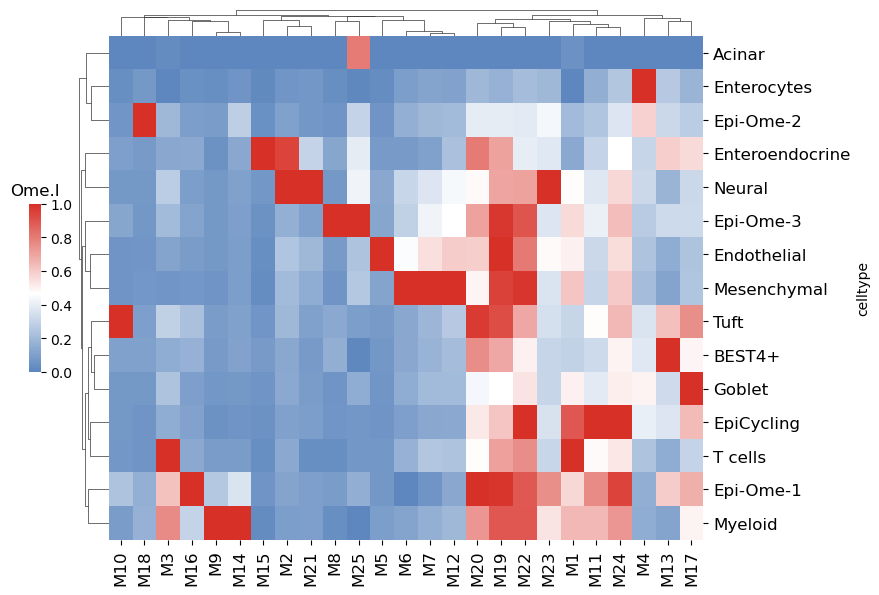

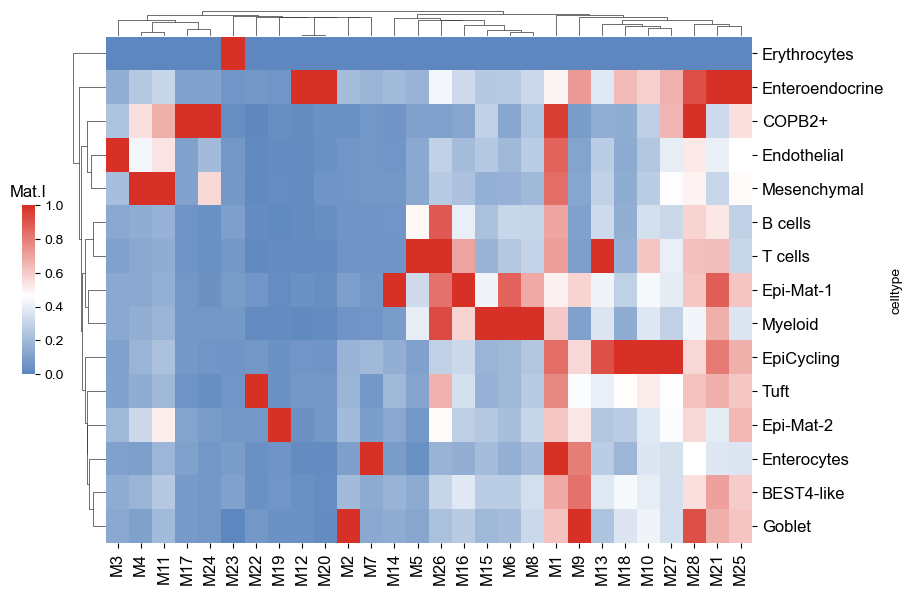

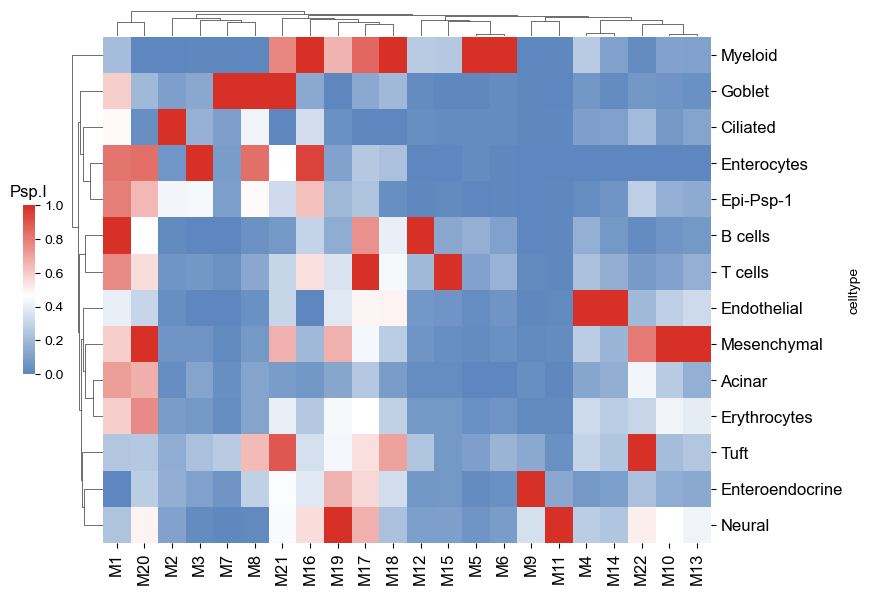

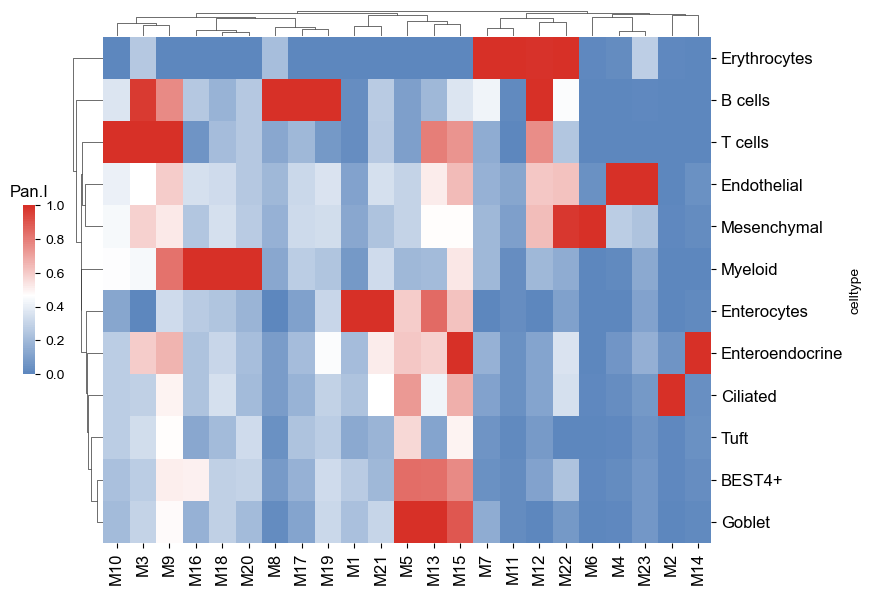

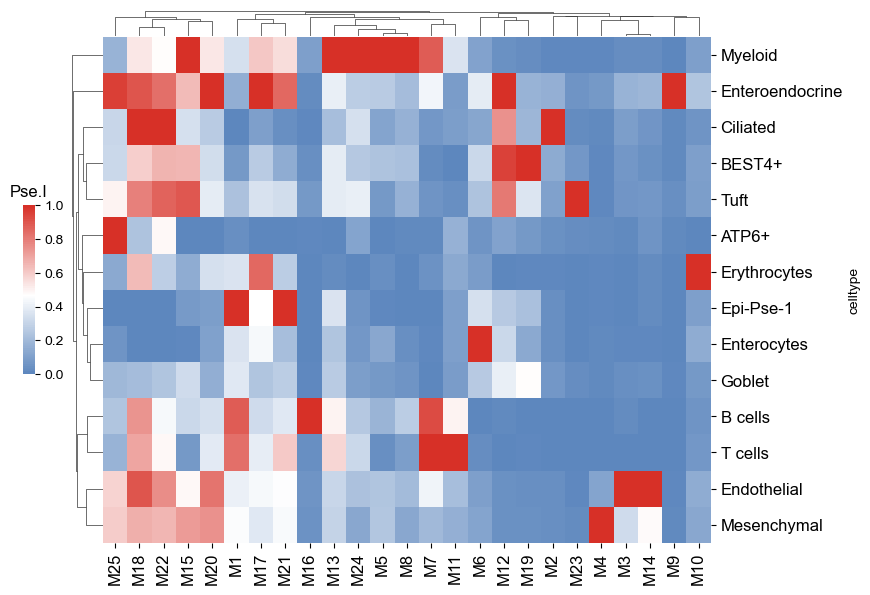

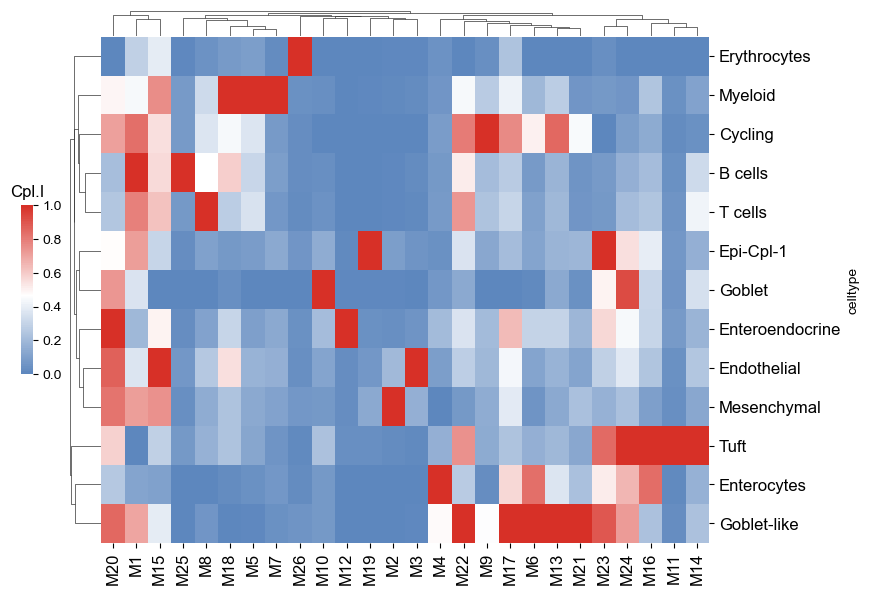

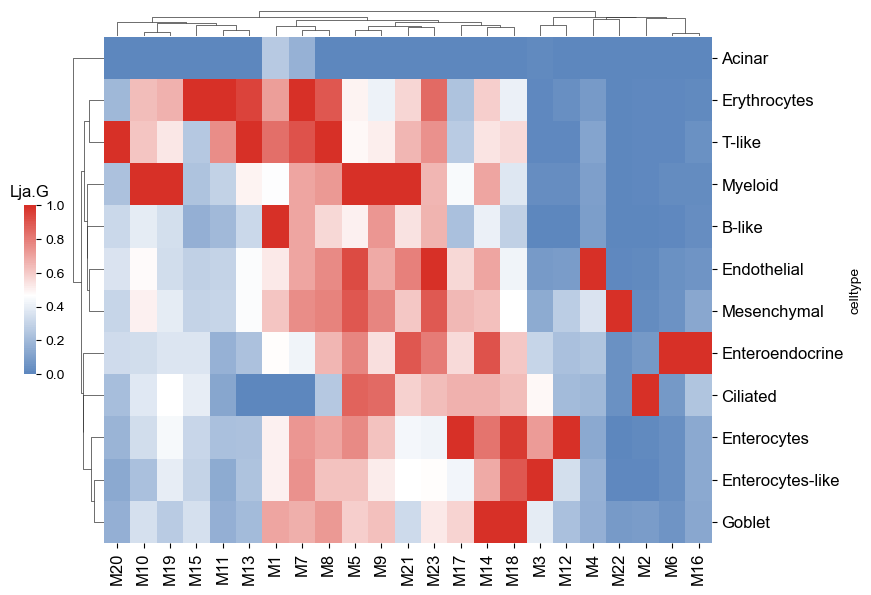

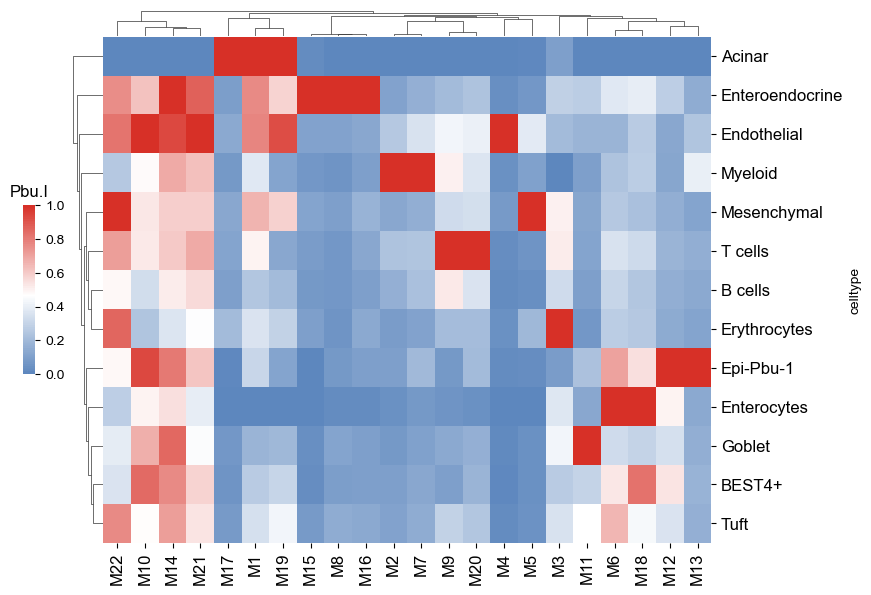

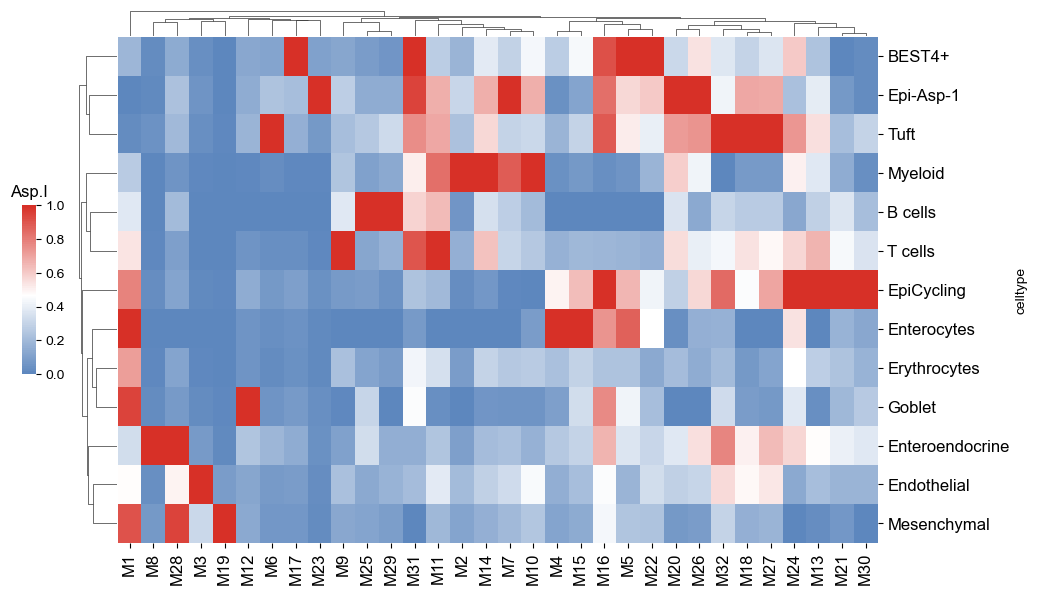

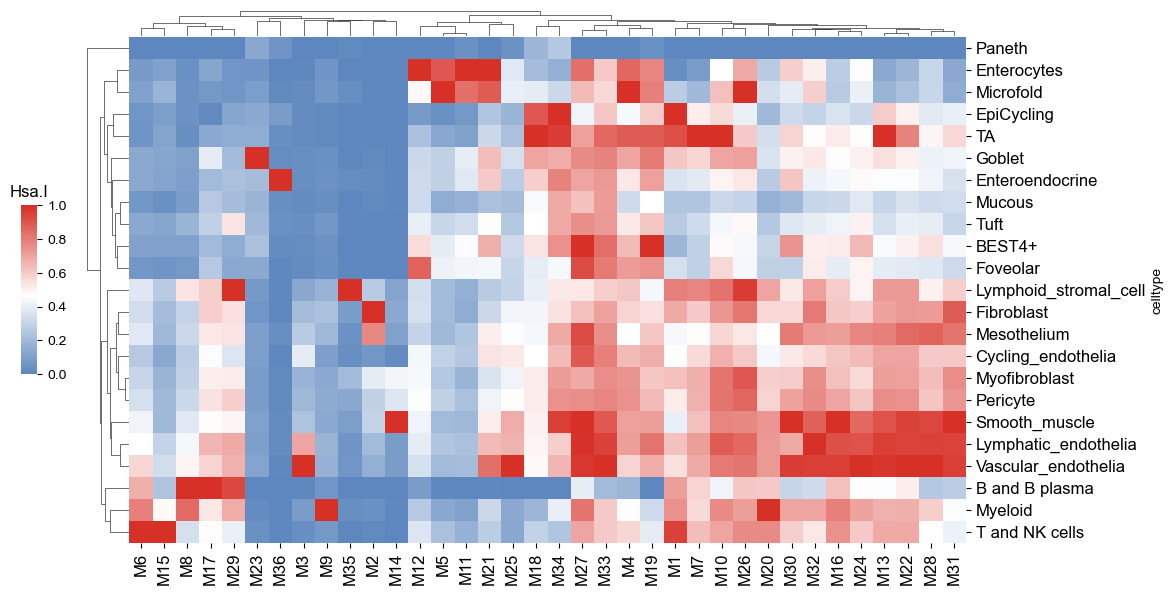

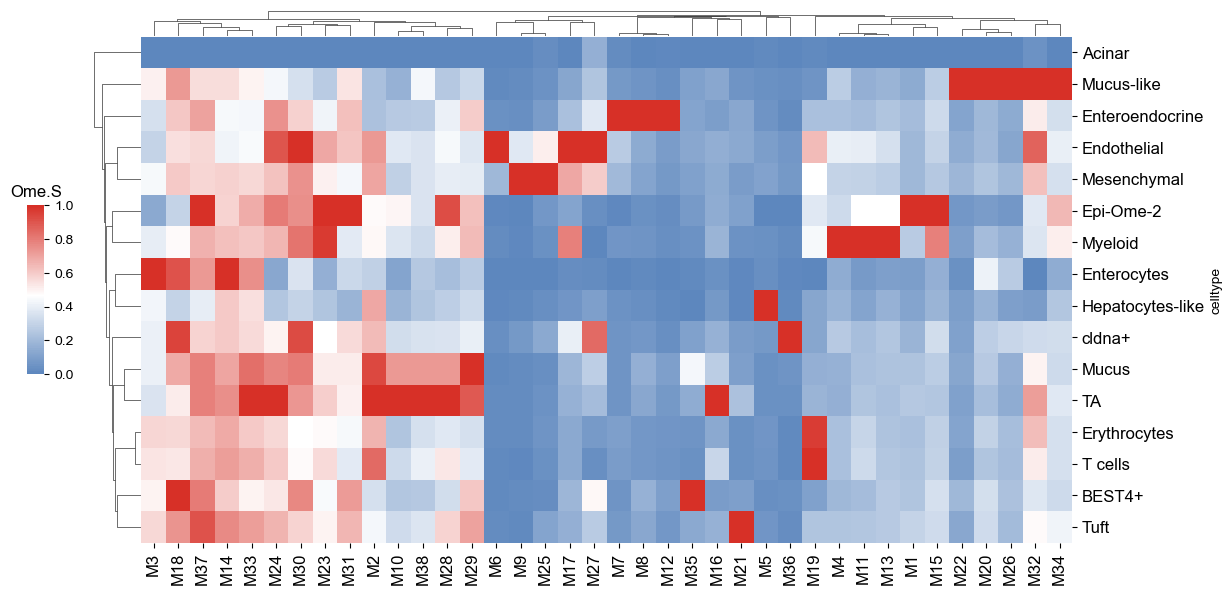

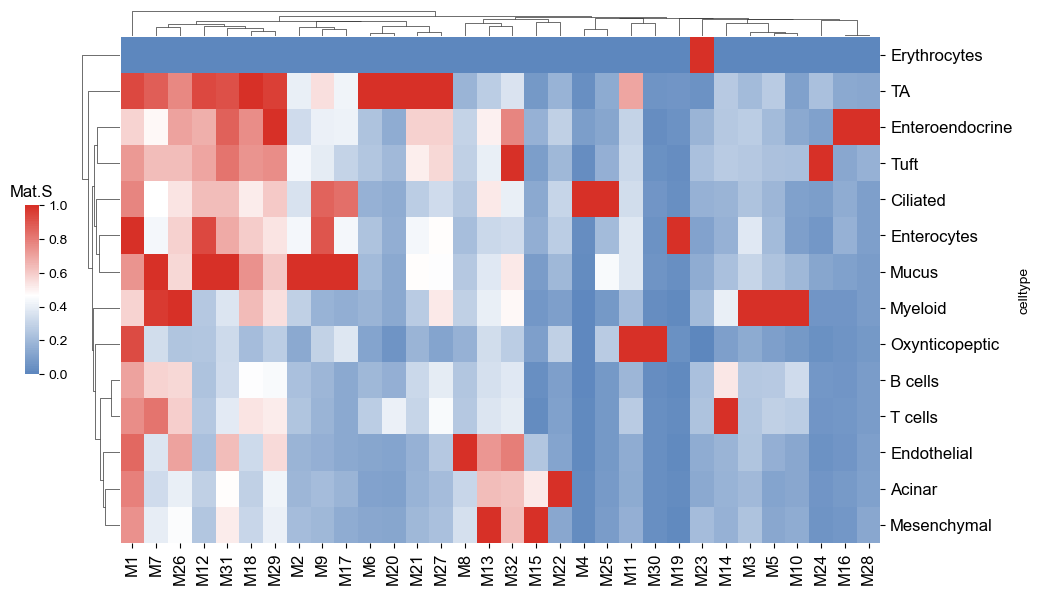

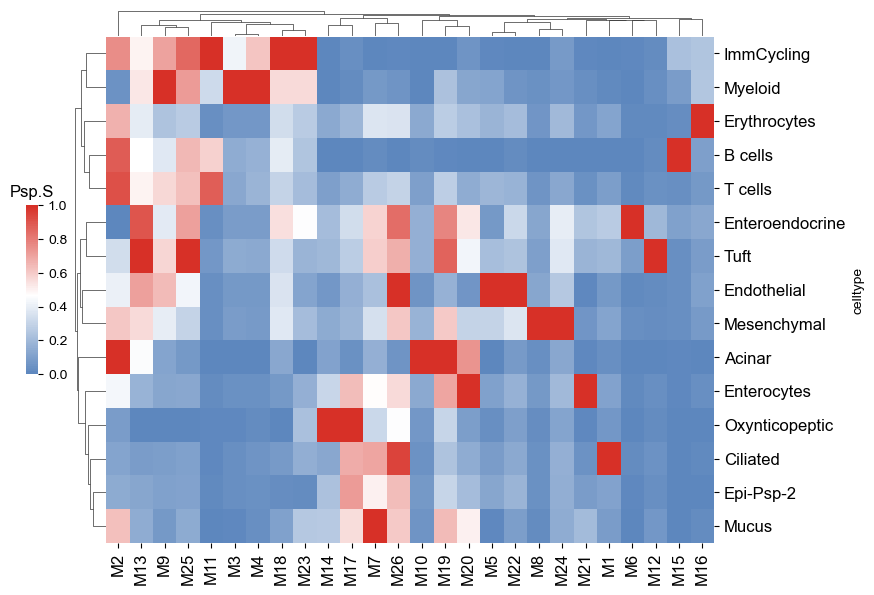

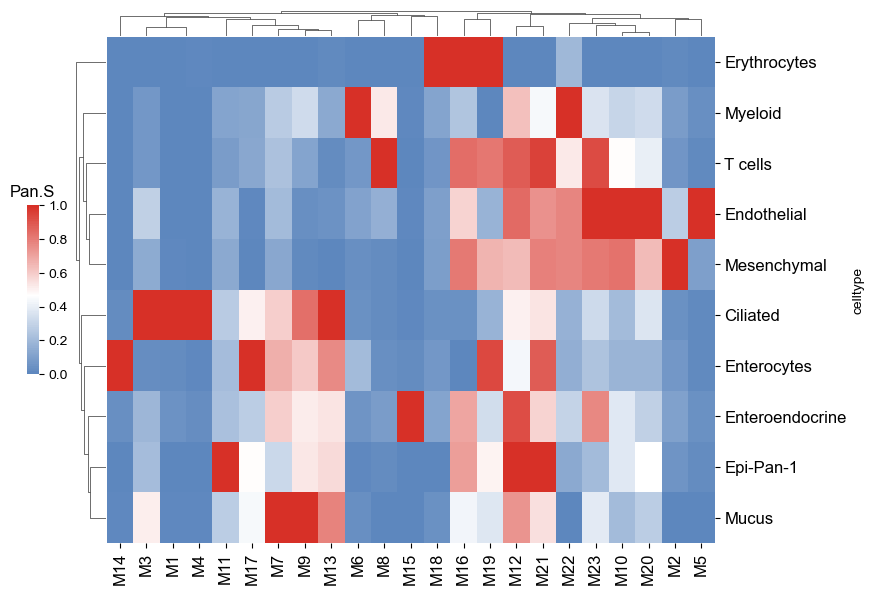

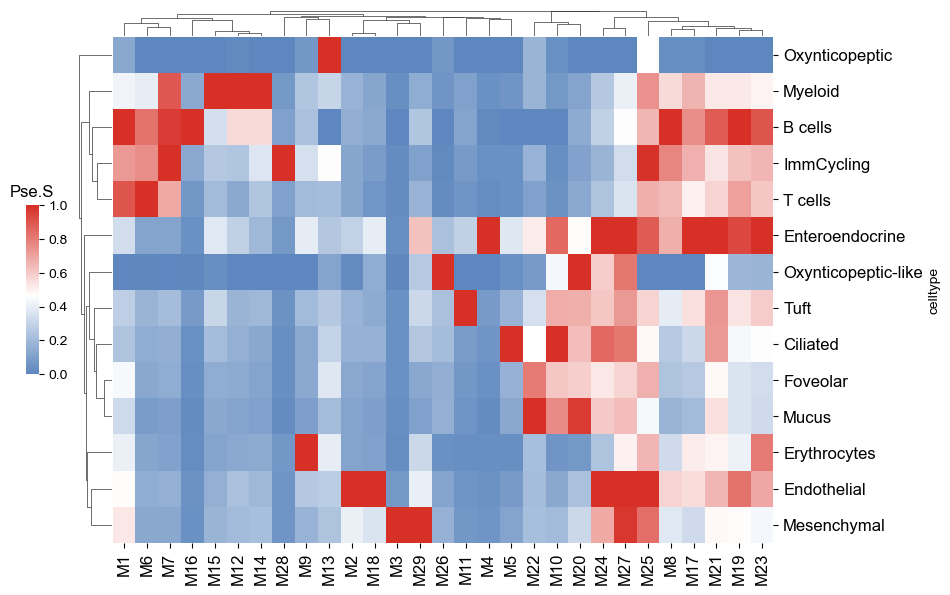

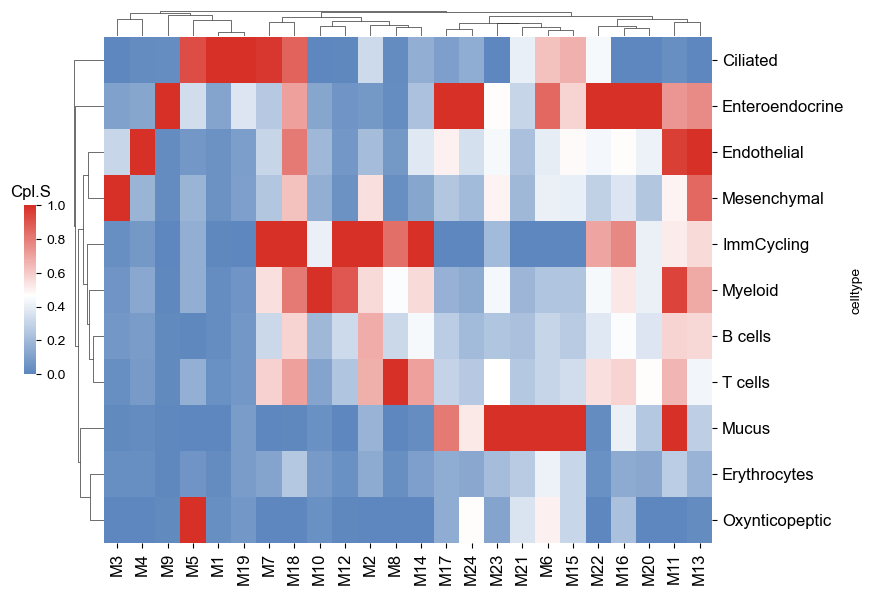

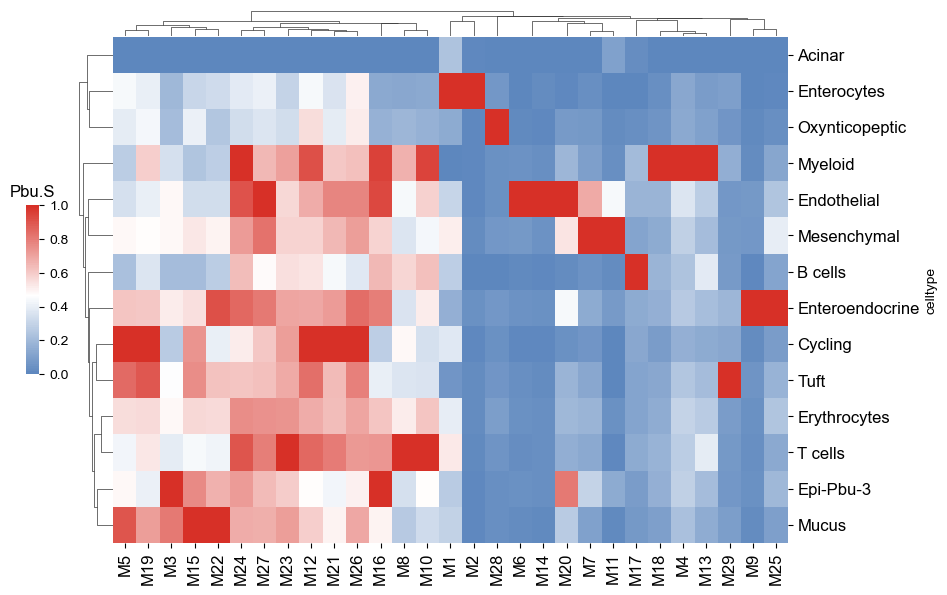

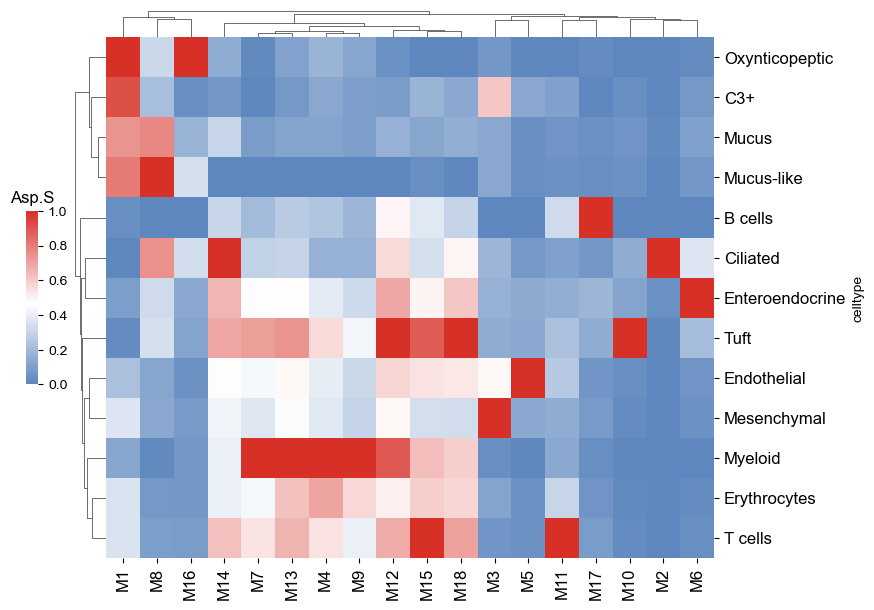

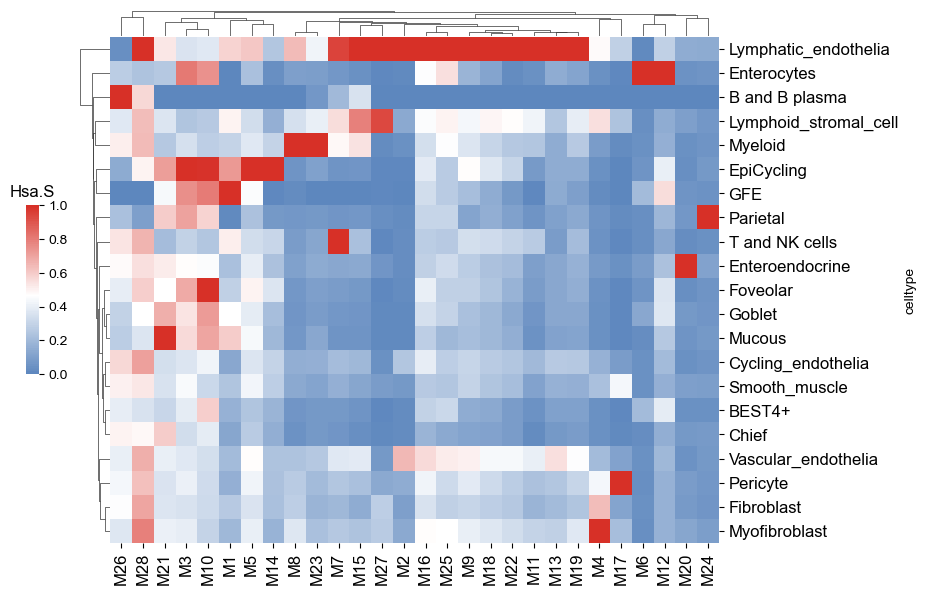

In [7]:
allax={}
allax['Ome_i'] = get_all(all_adata['1i'],module['1i'],'Ome.I','./picture/heatmap/Ome_i_heatmap.pdf')
allax['Mat_i'] = get_all(all_adata['2i'],module['2i'],'Mat.I','./picture/heatmap/Mat_i_heatmap.pdf')
allax['Psa_i'] = get_all(all_adata['3i'],module['3i'],'Psp.I','./picture/heatmap/Psa_i_heatmap.pdf')
allax['Pan_i'] = get_all(all_adata['4i'],module['4i'],'Pan.I','./picture/heatmap/Pan_i_heatmap.pdf')
allax['Pse_i'] = get_all(all_adata['5i'],module['5i'],'Pse.I','./picture/heatmap/Pse_i_heatmap.pdf')
allax['Cpl_i'] = get_all(all_adata['6i'],module['6i'],'Cpl.I','./picture/heatmap/Cpl_i_heatmap.pdf')
allax['Lja_G'] = get_all(all_adata['7i'],module['7i'],'Lja.G','./picture/heatmap/Lja_i_heatmap.pdf')
allax['Pbu_i'] = get_all(all_adata['8i'],module['8i'],'Pbu.I','./picture/heatmap/Pbu_i_heatmap.pdf')
allax['Asp_i'] = get_all(all_adata['9i'],module['9i'],'Asp.I','./picture/heatmap/Asp_i_heatmap.pdf')
allax['Hsa_i'] = get_all(all_adata['hi'],module['hi'],'Hsa.I','./picture/heatmap/Hm_i_heatmap.pdf')

allax['Ome_s'] = get_all(all_adata['1s'],module['1s'],'Ome.S','./picture/heatmap/Ome_s_heatmap.pdf')
allax['Mat_s'] = get_all(all_adata['2s'],module['2s'],'Mat.S','./picture/heatmap/Mat_s_heatmap.pdf')
allax['Psa_s'] = get_all(all_adata['3s'],module['3s'],'Psp.S','./picture/heatmap/Psa_s_heatmap.pdf')
allax['Pan_s'] = get_all(all_adata['4s'],module['4s'],'Pan.S','./picture/heatmap/Pan_s_heatmap.pdf')
allax['Pse_s'] = get_all(all_adata['5s'],module['5s'],'Pse.S','./picture/heatmap/Pse_s_heatmap.pdf')
allax['Cpl_s'] = get_all(all_adata['6s'],module['6s'],'Cpl.S','./picture/heatmap/Cpl_s_heatmap.pdf')
allax['Pbu_s'] = get_all(all_adata['8s'],module['8s'],'Pbu.S','./picture/heatmap/Pbu_s_heatmap.pdf')
allax['Asp_s'] = get_all(all_adata['9s'],module['9s'],'Asp.S','./picture/heatmap/Asp_s_heatmap.pdf')
allax['Hsa_s'] = get_all(all_adata['hs'],module['hs'],'Hsa.S','./picture/heatmap/Hm_s_heatmap.pdf')